## 파이썬 들어가기

우선 기본적인 시각화 실습부터 바로 하고 알아보도록 하죠. 
아래 코드를 그대로 실행시켜주세요. 

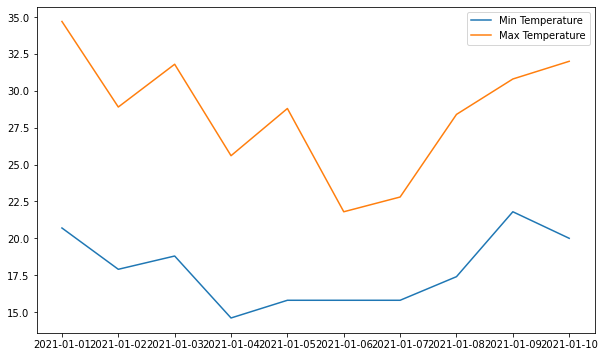

In [ ]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
axes.plot(dates, min_temperature, label = 'Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()
plt.show()

In [ ]:
print(fig)
print(axes)

Figure(720x432)
AxesSubplot(0.125,0.125;0.775x0.755)


fig와 axes, 바로 이해하기가 어렵습니다. 
아래 실습을 통해 더 자세히 알아보도록 하겠습니다. 

## Matplotlib

Matplotlib 그래프를 구현하는 방법은 크게 2가지가 있습니다. 

Pyplot API: Matplotlib.Pyplot 모듈에 있는 함수들을 각각 불러와서 구현하는 방법

객체 지향 API: Matplotlib에 구현된 객체 지향 라이브러리를 직접 활용하는 방법

주식 데이터에 대한 시각화를 통해 Matplotlib 라이브러리를 알아볼까요?

### 선 그래프

#### 방법 1. Pyplot API

야후에서 제공하는 yfinance 라이브러리를 통해 주식 데이터를 간단히 살펴보겠습니다. 

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 9.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=a2ab6d739fedb843950700aaa61e139d548745470d9387e2893139afffbe847a
  Stored in directory: /tmp/pip-ephem-wheel-cache-bqx_1z75/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2019-08-01", end="2020-08-01")
ts=data['Open']
print(ts.head())

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


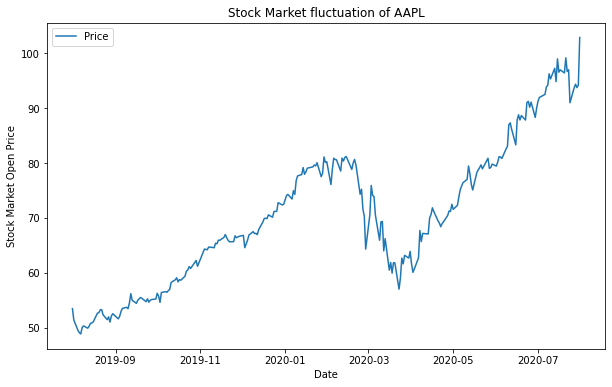

In [ ]:
import matplotlib.pyplot as plt

ts = data['Open']
plt.figure(figsize=(10,6))
plt.plot(ts)
plt.legend(labels=['Price'], loc='best')
plt.title('Stock Market fluctuation of AAPL') 
plt.xlabel('Date') 
plt.ylabel('Stock Market Open Price') 
plt.show()

plt가 반복적으로 사용된다는 점을 확인할 수 있습니다. 
plt 매소드 내에 ts 객체를 넣고 제목, x축, y축 등을 하나하나 삽입하는 방법입니다.  

#### 방법 2. 객체지향 API


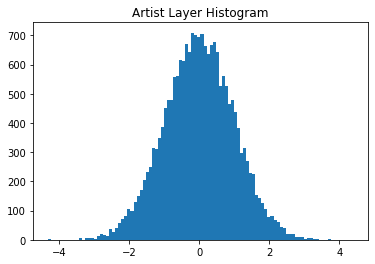

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig = Figure()

import numpy as np
np.random.seed(6)
x = np.random.randn(20000) 

ax = fig.add_subplot(111)
ax.hist(x, 100)
ax.set_title('Artist Layer Histogram')

fig

fig, ax를 선언하기 위해 코딩을 더 해야한다는 불편함이 있지만,
 ax 객체가 있어 그래프를 제어하기 더 쉬워집니다. 

### 방법 3. Pyplot API + 객체지향 API

[*********************100%***********************]  1 of 1 completed


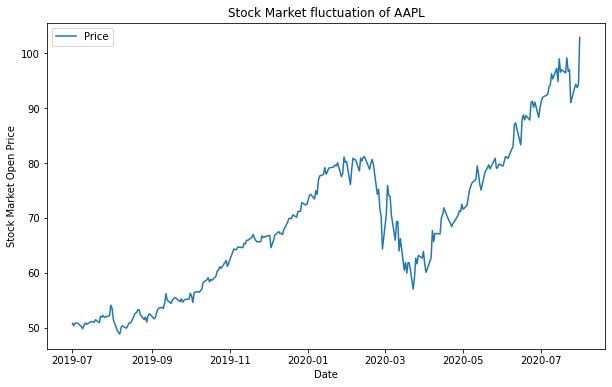

In [ ]:
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-07-01', '2020-08-01')
ts = data['Open']

fig = plt.figure(figsize=(10, 6)) # 직접 Figure 객체 생성
ax= fig.subplots() # 직접 axes를 생성
ax.plot(ts) # 생성된 axes 에 대한 plot() 멤버 직접 호출 
ax.set_title('Stock Market fluctuation of AAPL')
ax.legend(labels=['Price'], loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Market Open Price')
plt.show()

Plt 클래스를 활용해 먼저 Figure 객체를 생성합니다. 

객체 지향 API과는 Plt 클래스를 활용하고 Ax에 해당하는 메소드를 활용한다는 차이점 있죠.

문법이 조금 더 이해하기 쉽죠? 

### 막대 그래프

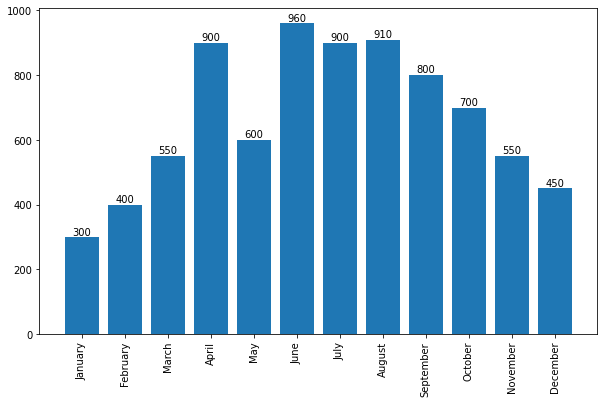

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

fig, ax = plt.subplots(figsize=(10,6))

plot = ax.bar(month_list, sold_list)

plt.xticks(month_list, calendar.month_name[1:13], rotation=90)

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % 
    int(height), ha='center', va='bottom')

plt.show()

이 실습에서 대부분은 사실 기본적인 코드입니다. 

하지만 눈에 띄는 건 바로 각 막대 위에 숫자겠죠? 

for rect in plot 반복문을 자세히 살펴보시길 바랍니다. 


### 산점도 그래프


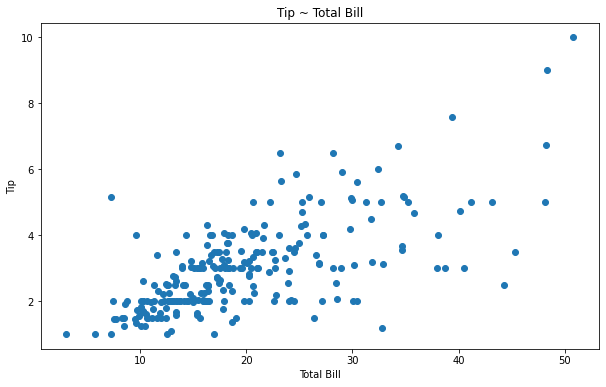

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip ~ Total Bill')

fig.show() 

기본적인 산점도 그래프입니다. 

참고로 데이터는 Seaborn 이라는 또다른 시각화 라이브러리에서 제공되는 데이터입니다. 

전체 가격과 팁의 분포를 비교하고 두 변수 사이에 상관관계가 있는지 여부를 확인할 수 있습니다. 

하지만 데이터 내에 구별되는 그룹을 확인할 수 있으면 더 좋지 않을까요? 예를 들자면 성별? 

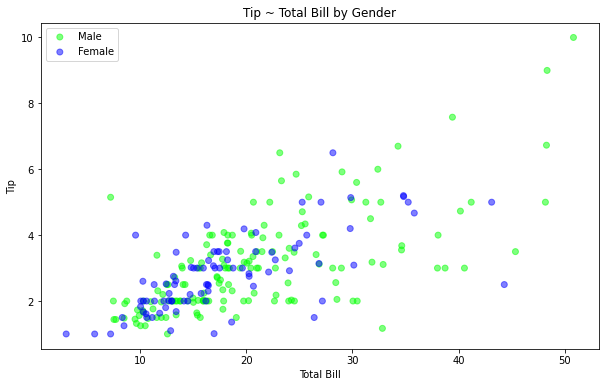

In [ ]:
label, data = tips.groupby('sex')

tips['sex_color'] = tips['sex'].map({"Female" : "#0000FF", "Male" : "#00FF00"})

fig, ax = plt.subplots(figsize=(10, 6))
for label, data in tips.groupby('sex'):
  ax.scatter(data['total_bill'], data['tip'], label=label, 
             color=data['sex_color'], alpha=0.5)
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')
  ax.set_title('Tip ~ Total Bill by Gender')

ax.legend() 
fig.show()        

어떤가요? 간단한 전처리로 남성과 여성을 구별했습니다. 

남성이 여성보다 Total Bill과 Tip이 더 많은걸 확인할 수 있죠. 

### 히스토그램


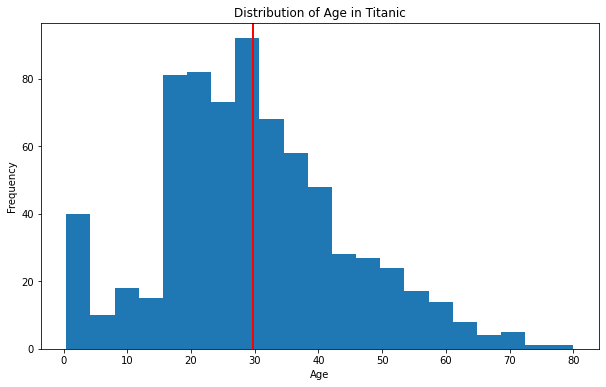

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
age = titanic['age']

nbins = 21
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(age, bins = nbins)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Age in Titanic")
ax.axvline(x = age.mean(), linewidth = 2, color = 'r')
fig.show()

이번에는 타이타닉 데이터에서 나이의 분포를 확인하는 시각화를 구현했습니다. 

nbins가 현재 21로 설정되어 있는데, 한번 다른 숫자로 바꿔보시길 바랍니다. 



### 박스플롯

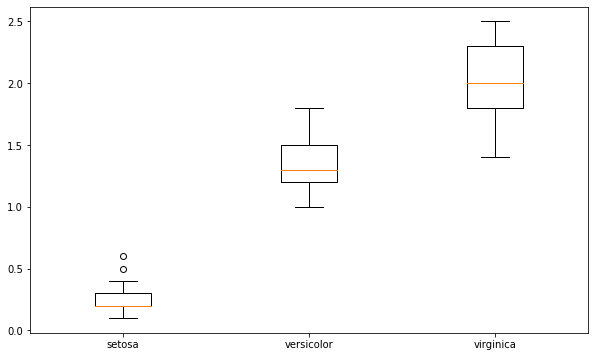

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

간단하면서도 유용한 박스플롯 시각화입니다. 

여기서 살펴봐야하는 코드는, 데이터를 리스트로 담는다는 것입니다. 

그 이유는 Labels에 있는 값과 하나씩 일치시키기 위해서입니다.

### 히트맵


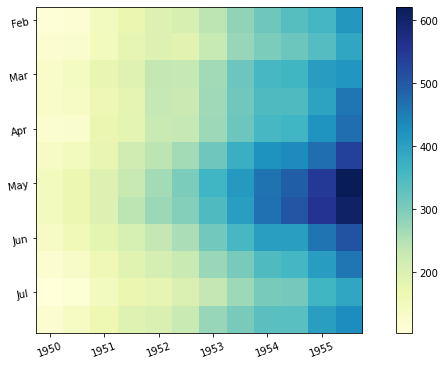

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(flights, cmap = 'YlGnBu')
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

fig.show()

상관 행렬을 히트 맵으로 표시하는 예를 실습해봤습니다. 

상관 행렬의 요소는 두 변수 사이의 선형 관계의 강도를 나타내며, 행렬에는 주어진 데이터에 포함된 속성의 모든 조합에 대한 값을 포함합니다. 예를 들어서 데이터에 5개의 속성이 있으면 상관 행렬은 5x5 행렬입니다.

코드를 살펴보면 Imshow( ) 함수 안에 Cmap이라는 인수가 있습니다. 

이 부분은 Colormaps에 해당하는 영역으로, YlGnBu 외에도 Greys, Purples, OrRd와 같은 다양한 선택지가 있습니다. 

## Seaborn

지금까지 Matplotlib 모듈을 통한 시각화를 살펴봤습니다. 
이번에는 Seaborn 이라는 또다른 시각화 모듈을 간단히 살펴보겠습니다. 

데이터프레임을 List로 처리하지 않아도 되기 때문에 더 쉽다고 할 수 있습니다. 

### 산점도와 회귀선이 있는 산점도

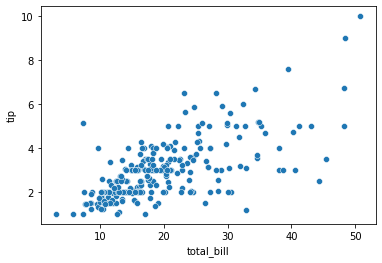

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x = "total_bill", y = "tip", data = tips)

plt.show()

자 우선 seaborn 모듈의 scatterplot() 통해 기본적인 산점도 그래프를 구현했습니다.

seaborn 모듈에는 scatterplot() 외에 relplot( ) 또는 regplot( )으로도 산점도 그래프를 구현할 수 있습니다. 

아래에서 확인해보도록 하죠. 그리고 확인하는 김에 회귀선도 추가해보겠습니다.  

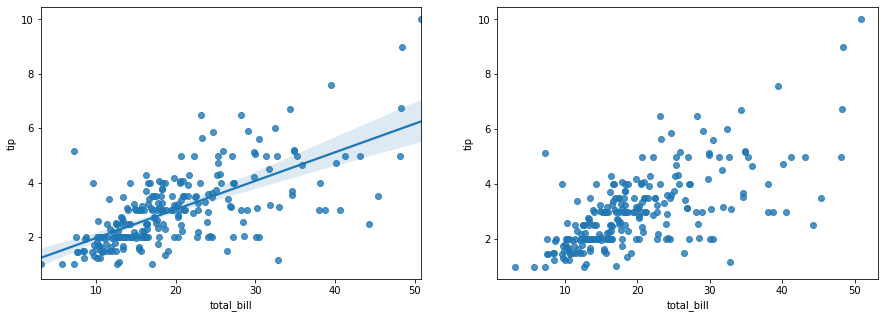

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[0], 
            fit_reg = True)

sns.regplot(x = "total_bill", 
            y = "tip", 
            data = tips, 
            ax = ax[1], 
            fit_reg = False)

plt.show()

확실히 matplotlib 보다는 seaborn의 코드 난이도가 낮습니다. 
특히 별도의 가공 없이 변수명을 입력하기만 해도 시각화를 할 수 있어서 편하죠. 

한가지 포인트는 Fit_Reg=True로 설정 하면 회귀선이 그려진다는 것입니다. 
데이터의 방향성을 알 수 있죠.



## Matplotlib와 Seaborn을 동시에 사용한 Subplotting 기법

자, 지금까지 두가지 시각화 모듈의 기초를 살펴봤습니다.  

이제 두가지를 동시에 사용해서 두개의 그래프를 한꺼번에 구현해보도록 하겠습니다. 

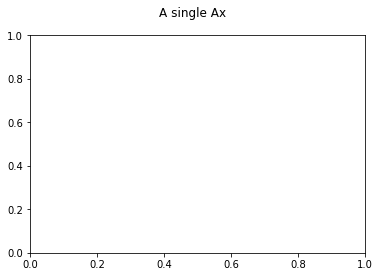

In [ ]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
fig.suptitle('A single Ax')
plt.show()

제일 기초적인 틀입니다. 

subplots()를 사용했지만 아무 값을 넣지 않는다면 기본적으로 하나의 그래프만 나옵니다. 

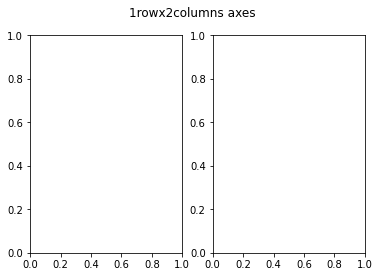

In [ ]:
import matplotlib.pyplot as plt
fig, axes=plt.subplots(1, 2)
fig.suptitle('1rowx2columns axes')
fig.show()

자 이번에는 subplot()에 행의 개수와 열의 개수를 넣어줬습니다. 

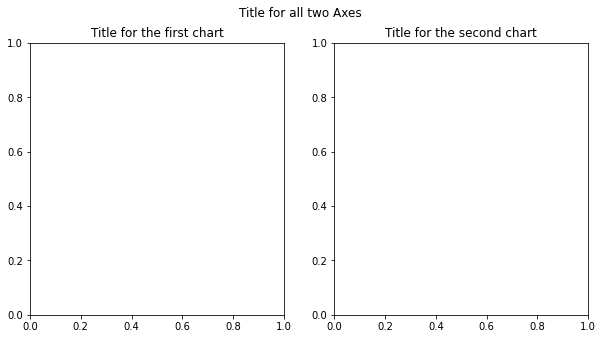

In [ ]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Title for all two Axes')
ax[0].set_title('Title for the first chart')
ax[1].set_title('Title for the second chart')
fig.show()

제목들도 넣고 크기도 키워봤습니다. 

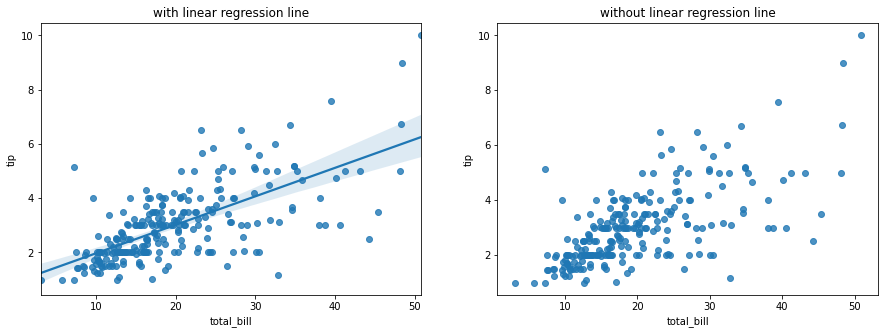

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

fig.show()

Total bill와 tip의 두 산점도를 그래프를 구현해보았습니다. 

### 히스토그램/커널 밀도 그래프


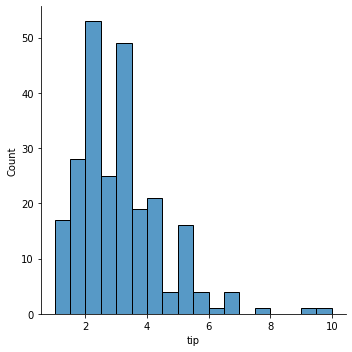

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
sns.displot(x = "tip", data = tips)

plt.show()

연속형(수치형) 데이터의 분포를 정확하게 나타내는 히스토그램입니다. 

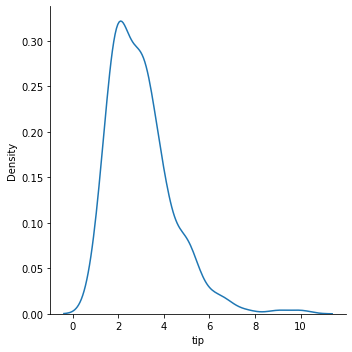

In [ ]:
sns.displot(x="tip", kind="kde", data=tips)
plt.show()

이번에는 커널 밀도 그래프를 그립니다. Kind="Kde"만 추가하면 됩니다. 

y축이 히스토그램의 개수와 달리, 비율이라는 점을 확인하시길 바랍니다. 

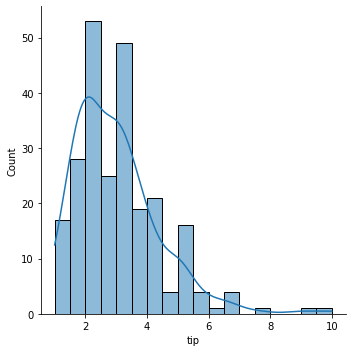

In [ ]:
sns.displot(x="tip", kde=True, data=tips)
plt.show()

이번에는 히스토그램과 커널 밀도가 합쳐진 그래프입니다. 
kde=True 만 추가하면 됩니다. 

### 박스플롯

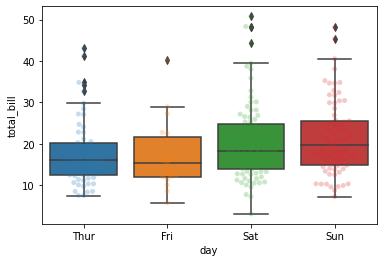

In [ ]:
sns.boxplot(x = "day", y = "total_bill", data = tips)
sns.swarmplot(x = "day", y = "total_bill", data = tips, alpha = .25)
plt.show()

seaborn에서도 박스플롯을 쉽게 구현할 수 있습니다.

alpha=.25로 투명도를 높인 swarmplot으로 시각화을 더 자세히 구현해보았습니다. 

기억해야하는 점은 몇가지의 그래프를 해도 한 plt으로 구현된다는 것입니다. 

### 막대 그래프

지금까지는 제일 기본적인 시각화만 살펴보았는데, 조금 더 깊게 들어가볼까요? 

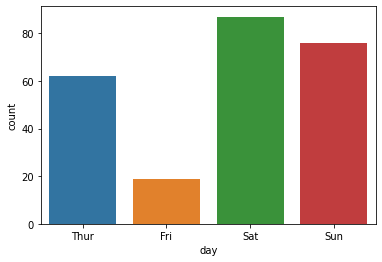

In [ ]:
sns.countplot(x = "day", data = tips)
plt.show()

우선, 제일 기본적인 seaborn을 통한 막대 그래프입니다. 

In [ ]:
print(tips['day'].value_counts())
print("index: ", tips['day'].value_counts().index)
print("values: ", tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
index:  CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
values:  [87 76 62 19]


In [ ]:
print(tips['day'].value_counts(ascending=True))

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


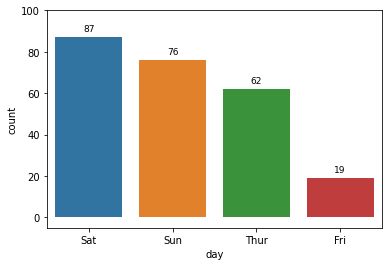

In [ ]:
ax = sns.countplot(x = "day", data = tips, order = tips['day'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
  
ax.set_ylim(-5, 100)
plt.show()

정렬을 통해 확인하기 더 쉬운 막대그래프입니다. 

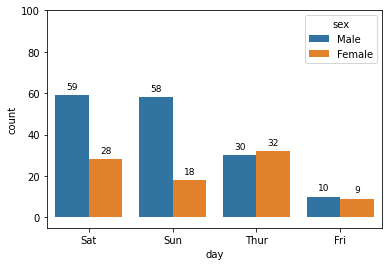

In [ ]:
ax = sns.countplot(x = "day", data = tips, hue = "sex",
              order = tips['day'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)

ax.set_ylim(-5, 100)

plt.show()

hue="sex"를 통해 성별에 따른 더 자세한 시각화입니다. 

이렇게 하나하나 추가하여 시각화를 더욱 자세히 구현할 수 있습니다. 

### 상관관계 그래프

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg")
print(mpg.shape) # 398 행, 9개 열

num_mpg = mpg.select_dtypes(include = np.number)
print(num_mpg.shape) # 398 행, 7개 열

(398, 9)
(398, 7)


In [ ]:
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [ ]:
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


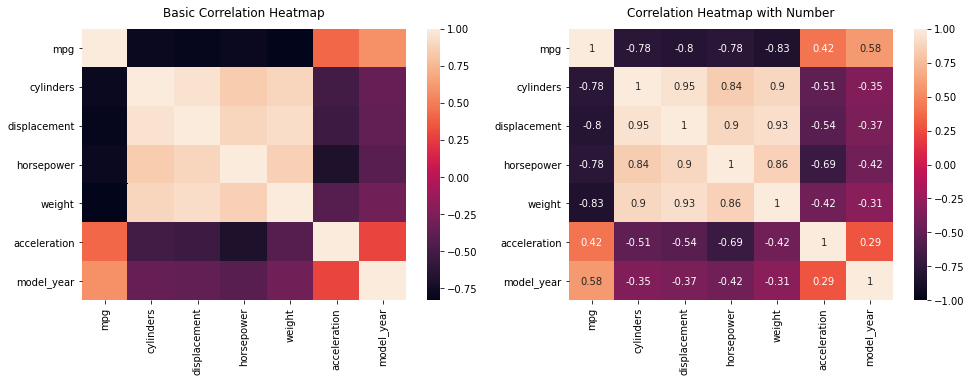

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# 상관관계 수치 그래프 [Correlation Heatmap with Number]
sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
ax[1].set_title('Correlation Heatmap with Number', pad = 12)

plt.show()

변수들의 관계를 한번 확인해보았습니다.

오른쪽 그림 맨 위에서 -0.83을 살펴보자면, x축은 Weight 변수이고, y축은 Mpg입니다. 

변수 Weight가 커지면 커질수록 변수 Mpg는 점점 작아지는 음의 상관관계를 의미합니다. 

가독성을 높이기 위해 더 작업 해보록 하겠습니다. 

In [ ]:
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

1을 기준으로 우측 그래프는 제거하기 위한 작업입니다. 

In [ ]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


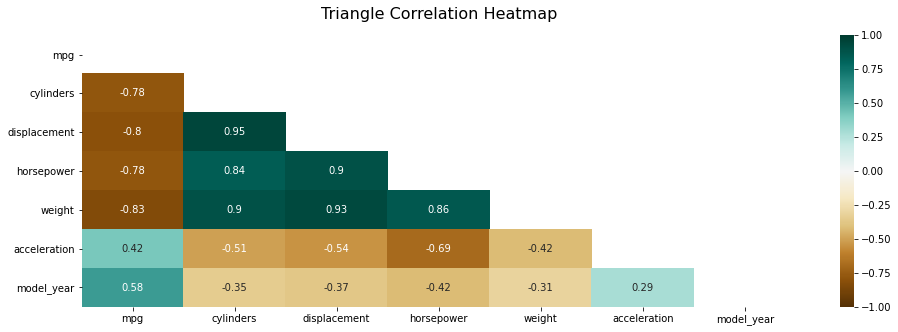

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))

ax = sns.heatmap(num_mpg.corr(), mask=mask, 
                 vmin=-1, vmax = 1, 
                 annot=True, 
                 cmap="BrBG", cbar = True)
ax.set_title('Triangle Correlation Heatmap', pad = 16, size = 16)
fig.show()

색상을 바꿔 보고 Colorbar도 추가합니다. 

처음 작성한 히트 맵보다 더 가독성이 높아 진 것을 확인할 수 있습니다. 


## Intermediate

이제 중급 시각화를 살펴보겠습니다. 

### 페가블로그 코드
- https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [ ]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

def major_formatter(x, pos):
    return "{%.2f}" % x
formatter = FuncFormatter(major_formatter)


In [ ]:
tips = sns.load_dataset("tips")
tips_day = tips.groupby("day").mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


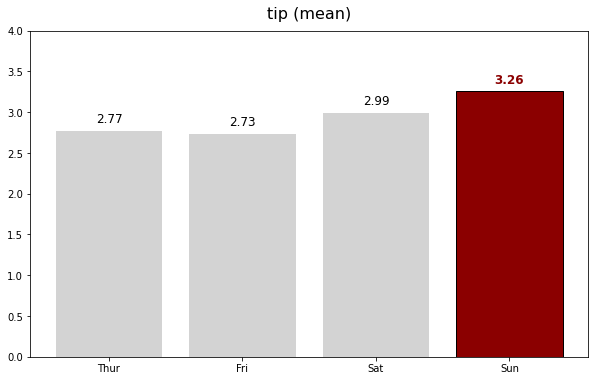

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder=2)

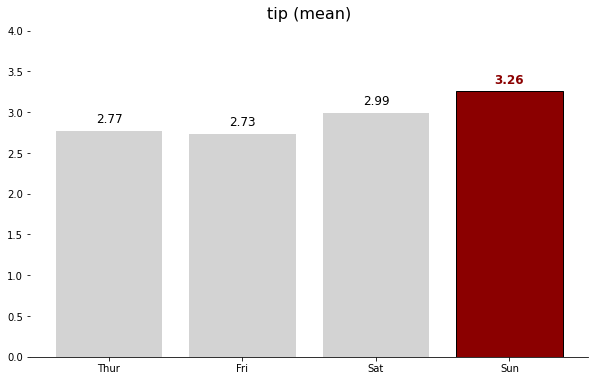

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

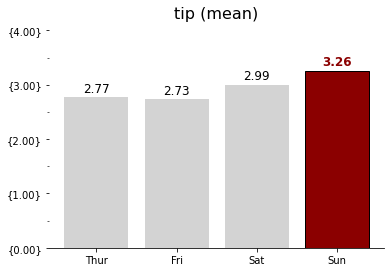

In [ ]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

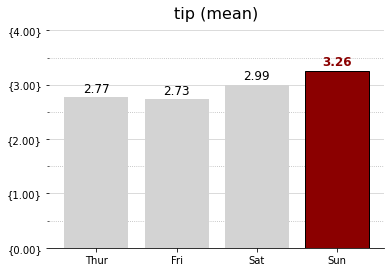

In [ ]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    
ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

### 책 코드

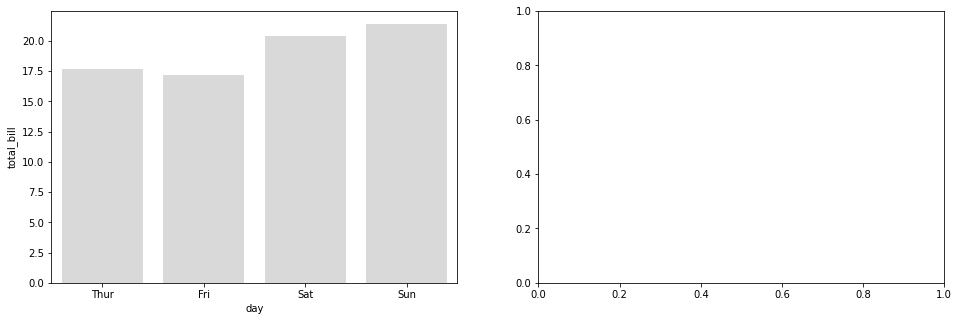

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

In [ ]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
print("The Best Day:", h_day)
print("The Highest Avg. Total Biil:", h_mean)

The Best Day: Sun
The Highest Avg. Total Biil: 21.41


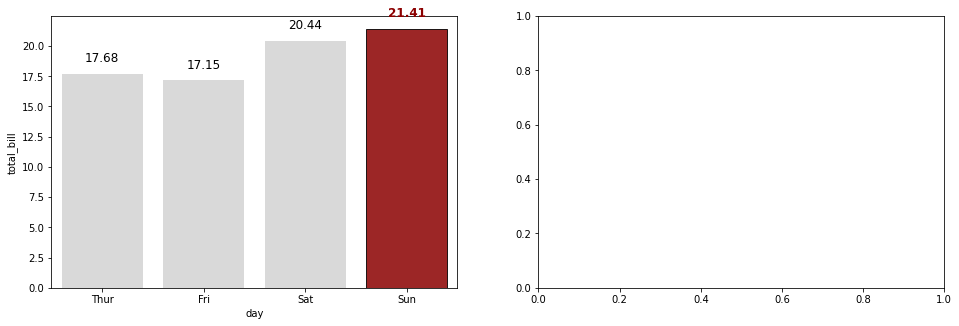

In [ ]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

fig.show()

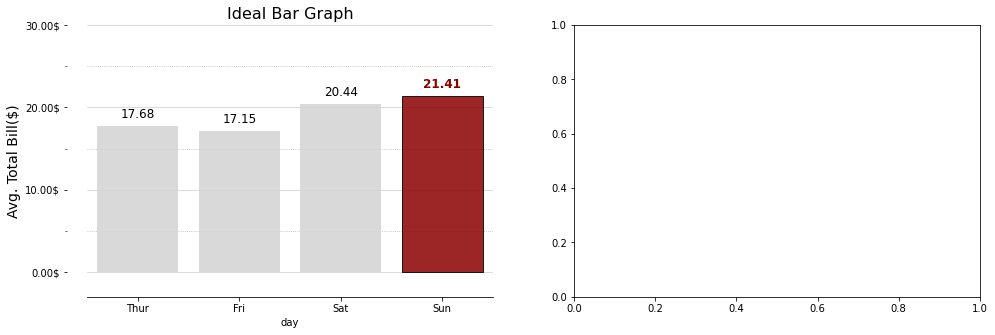

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

fig.show()

Text(0, 0, 'Thur')
Text(0, 0, 'Fri')
Text(0, 0, 'Sat')
Text(0, 0, 'Sun')


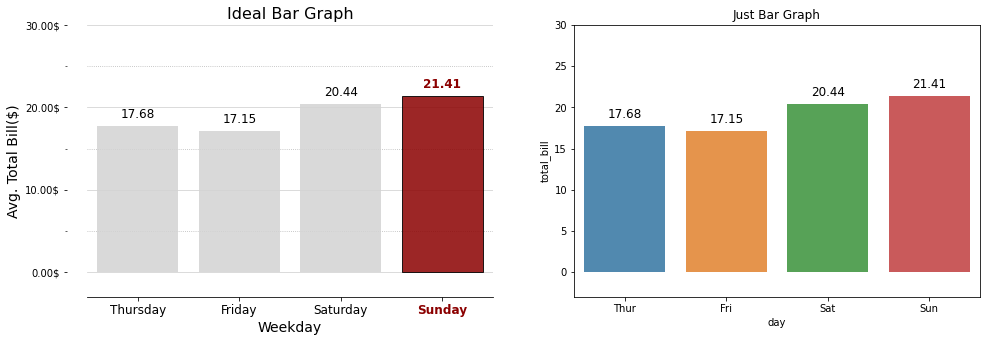

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()